In [2]:
import torch
import torchvision.transforms as transforms
from torchvision.models import efficientnet_v2_s, EfficientNet_V2_S_Weights
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

In [3]:
model = efficientnet_v2_s(weights=EfficientNet_V2_S_Weights.IMAGENET1K_V1)

In [4]:
print(f"{sum(p.numel() for p in model.parameters())} total parameters in EfficientNetV2")

21458488 total parameters in EfficientNetV2


In [5]:
image = mpimg.imread('/Users/mateo/Desktop/repo-projects/efficientnet-deployed/flask-api/images/elephant.jpeg')

In [6]:
img_tensor = torch.tensor(image)

In [7]:
if img_tensor.shape[-1] > 3:
    # Discard additional channels
    img_tensor = img_tensor[..., :3]


In [8]:
img_tensor

tensor([[[148, 183, 187],
         [137, 172, 176],
         [132, 165, 170],
         ...,
         [ 56,  66,  31],
         [ 72,  82,  47],
         [ 70,  80,  43]],

        [[136, 171, 175],
         [138, 173, 177],
         [138, 171, 176],
         ...,
         [ 55,  65,  30],
         [ 51,  61,  24],
         [ 68,  79,  39]],

        [[131, 166, 170],
         [137, 172, 176],
         [141, 174, 179],
         ...,
         [ 55,  65,  28],
         [ 55,  66,  26],
         [ 74,  85,  43]],

        ...,

        [[ 23,  24,   6],
         [ 23,  24,   6],
         [ 21,  22,   4],
         ...,
         [178, 173, 135],
         [179, 174, 136],
         [179, 174, 136]],

        [[ 23,  24,   6],
         [ 22,  23,   5],
         [ 20,  21,   3],
         ...,
         [178, 173, 135],
         [179, 174, 136],
         [179, 174, 136]],

        [[ 22,  23,   5],
         [ 22,  23,   5],
         [ 19,  20,   2],
         ...,
         [168, 163, 125],
        

In [9]:
img_tensor.shape

torch.Size([5892, 3928, 3])

In [10]:
img_correct_shape = img_tensor.permute(2, 0, 1) # correct shape

In [11]:
# transform used in training
efficientnet_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((384, 384), interpolation=F.InterpolationMode.BILINEAR),
    transforms.CenterCrop(384),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

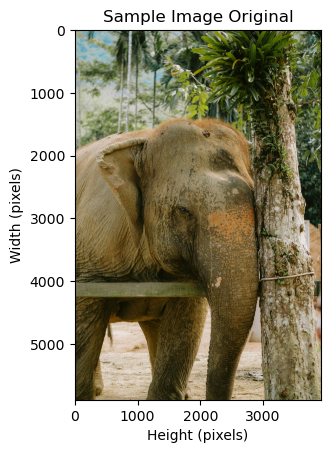

<Figure size 640x480 with 0 Axes>

In [12]:
plt.imshow(img_tensor)
plt.title("Sample Image Original")
plt.xlabel("Height (pixels)")
plt.ylabel("Width (pixels)")
plt.show()
plt.clf()

In [13]:
transformed = efficientnet_transforms(img_correct_shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


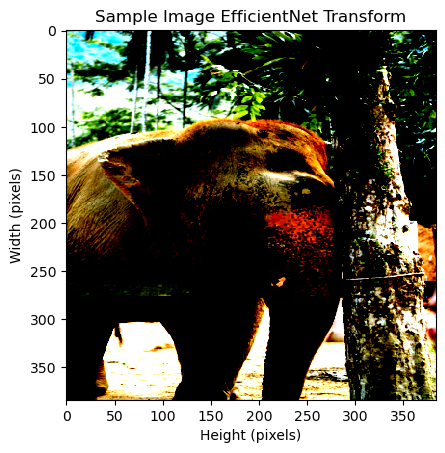

<Figure size 640x480 with 0 Axes>

In [14]:
plt.imshow(transformed.permute(1, 2, 0), interpolation="nearest")
plt.title("Sample Image EfficientNet Transform")
plt.xlabel("Height (pixels)")
plt.ylabel("Width (pixels)")
plt.show()
plt.clf()

In [15]:
transformed.shape

torch.Size([3, 384, 384])

In [16]:
model.eval()
pred = model(transformed.unsqueeze(dim=0))

In [17]:
pred

tensor([[-3.4967e-01, -1.6173e-02, -1.1745e-01, -2.0719e-01, -1.1277e-01,
          4.1285e-01,  2.0436e-01, -1.9082e-01, -6.1695e-01,  1.9186e-01,
         -4.0362e-01,  6.5021e-02, -1.2584e-01,  1.5100e-01,  1.7020e-01,
         -3.4452e-01,  5.1211e-01,  1.0631e-02,  3.2500e-01,  4.9044e-01,
         -1.5343e-01, -8.5041e-02, -3.2568e-01, -4.9012e-03, -5.5138e-01,
         -3.0862e-02,  3.3893e-02, -2.1556e-01, -2.8867e-01, -9.3564e-02,
         -7.1522e-01, -2.0953e-01, -1.8528e-02, -3.3483e-01,  1.8590e-01,
          1.7775e-01,  1.0066e-01,  3.0277e-01, -2.7391e-01,  2.9625e-01,
          1.9158e-01, -3.0979e-01,  1.8433e-01,  8.3186e-02, -4.3480e-01,
          2.3011e-01, -1.1102e-01,  5.0834e-01,  9.4901e-01, -9.6383e-02,
         -2.5968e-01,  1.5870e-01,  2.7042e-02, -1.5383e-01,  2.3339e-01,
         -3.6042e-01, -9.4185e-02, -2.1592e-01,  4.7795e-01,  1.5408e-01,
         -1.3567e-01, -5.0673e-03, -3.8017e-01,  5.3561e-01, -1.7237e-01,
         -2.1672e-01,  1.8314e-01, -1.

In [18]:
result = torch.sort(pred.softmax(dim=1), descending=True)

In [19]:
result

torch.return_types.sort(
values=tensor([[7.5331e-01, 2.8223e-02, 1.1082e-02, 6.2604e-04, 5.6407e-04, 5.5849e-04,
         5.3521e-04, 5.1865e-04, 5.0899e-04, 4.9556e-04, 4.8231e-04, 4.8076e-04,
         4.7462e-04, 4.6220e-04, 4.5216e-04, 4.3805e-04, 4.3157e-04, 4.2918e-04,
         4.2252e-04, 4.1581e-04, 4.0775e-04, 4.0567e-04, 4.0265e-04, 3.9877e-04,
         3.8999e-04, 3.8556e-04, 3.8393e-04, 3.8346e-04, 3.7979e-04, 3.7861e-04,
         3.7572e-04, 3.7526e-04, 3.7076e-04, 3.6748e-04, 3.6735e-04, 3.6466e-04,
         3.6374e-04, 3.5275e-04, 3.5209e-04, 3.5027e-04, 3.4581e-04, 3.4555e-04,
         3.4500e-04, 3.4463e-04, 3.4303e-04, 3.4248e-04, 3.4168e-04, 3.4143e-04,
         3.4124e-04, 3.4004e-04, 3.4000e-04, 3.3973e-04, 3.3936e-04, 3.3857e-04,
         3.3810e-04, 3.3806e-04, 3.3779e-04, 3.3516e-04, 3.3507e-04, 3.3470e-04,
         3.3459e-04, 3.3381e-04, 3.3343e-04, 3.3320e-04, 3.3106e-04, 3.2936e-04,
         3.2868e-04, 3.2788e-04, 3.2713e-04, 3.2582e-04, 3.2563e-04, 3.2497e-

In [20]:
probabilities = torch.Tensor.tolist(result.values * 100)

In [21]:
probabilities = probabilities[0] # Getting rid of extra dim

In [22]:
indices_list = torch.Tensor.tolist(result.indices)[0]

In [23]:
import json
with open("imagenet_class_index.json", "r") as f:
    class_dict = json.load(f)
classes = ([value[1] for value in class_dict.values()])

In [24]:
probabilities

[75.33106994628906,
 2.8223085403442383,
 1.108202338218689,
 0.06260412186384201,
 0.05640704184770584,
 0.055848754942417145,
 0.053520750254392624,
 0.051864735782146454,
 0.050898753106594086,
 0.049556318670511246,
 0.04823077842593193,
 0.04807622358202934,
 0.04746163636445999,
 0.04622003436088562,
 0.04521568864583969,
 0.043804701417684555,
 0.043157435953617096,
 0.04291761294007301,
 0.042252421379089355,
 0.04158123582601547,
 0.04077531024813652,
 0.040567412972450256,
 0.040265072137117386,
 0.039877161383628845,
 0.03899860382080078,
 0.03855635225772858,
 0.03839299827814102,
 0.038346175104379654,
 0.03797854483127594,
 0.03786104917526245,
 0.03757178783416748,
 0.037525519728660583,
 0.03707615286111832,
 0.036748018115758896,
 0.036734841763973236,
 0.036465730518102646,
 0.036374226212501526,
 0.03527473285794258,
 0.03520916402339935,
 0.03502686694264412,
 0.03458089381456375,
 0.03455536067485809,
 0.034499846398830414,
 0.03446318209171295,
 0.0343033298850059

In [29]:
print(f"Model is {probabilities[0]:4f}% sure image is a {classes[indices_list[0]]}")

Model is 23.675009% sure image is a screen


In [26]:
probabilities[1], classes[indices_list[1]]

(2.8223085403442383, 'African_elephant')

In [27]:
probabilities[2], classes[indices_list[2]]

(1.108202338218689, 'tusker')